In [18]:
print("Hello")

Hello


In [19]:
from typing_extensions import TypedDict

class State(TypedDict):
    graph_info: str

In [20]:
def start_play(state: State):
    print("Start Play node has been called.")
    return {"graph_info":state["graph_info"] + "I am planning to play"}


def cricket(state: State):
    print("Cricket node has been called.")
    return {"graph_info": state["graph_info"] + " Cricket."}


def badminton(state: State):
    print("Badminton node has been called.")
    return {"graph_info": state["graph_info"] + " Badminton."}



In [21]:
import random
from typing import Literal

def random_play(state: State)-> Literal["cricket", "badminton"]:
    if random.random() > 0.5:
        return "cricket"
    else:
        return "badminton"

In [22]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

## Build Graph
graph=StateGraph(State)

## add all nodes
graph.add_node("start_play", start_play)
graph.add_node("cricket", cricket)
graph.add_node("badminton", badminton)

## Schedule the flow of the graph
graph.add_edge(START, "start_play")
graph.add_conditional_edges("start_play", random_play)
graph.add_edge("cricket", END)
graph.add_edge("badminton", END)

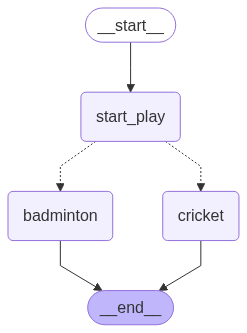

In [23]:
## Compile the graph
graph_builder  = graph.compile()

##View
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [24]:
graph_builder.invoke({"graph_info": "My name is Suprit."})

Start Play node has been called.
Badminton node has been called.


{'graph_info': 'My name is Suprit.I am planning to play Badminton.'}